**IMPORTING ALL THE NECCESARY LIBRARIES**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**READING THE DATASET**

In [102]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


UNDERSTANDING THE DATASET

In [103]:
df.shape

(7043, 21)

In [104]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customer id is of no use as it is generated at random for each customer and is every time it is unique. so it gives no relation with churn column.

In [106]:
df.drop('customerID',axis=1,inplace=True)

In [107]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

here we can observe that Totalcharges are of type object but it is supposed to be of type float64.So we first convert it to float

In [109]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [110]:
df['TotalCharges'].replace(np.nan,df['TotalCharges'].mean(),inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [113]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

**Let us check the unique value counts of each object type column in the dataset**

In [114]:
def fun(df):
  categorical_columns = df.select_dtypes(include=['object']).columns
  for i in categorical_columns:
    x=df[i].value_counts()
    print("Value counts of ",i)
    print(x)
    print("--------------------------")
fun(df)

Value counts of  gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------
Value counts of  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------
Value counts of  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------
Value counts of  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------
Value counts of  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------
Value counts of  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------
Value counts of  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------------------
Value counts of  OnlineBackup
No                     3088
Yes  

Now let us check for Null values in the dataset.
---
As we replaced null values in TotalCharges with 0 and then with mean, dataset
has 0 null values

In [115]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [116]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


DATA VISUALIZATION

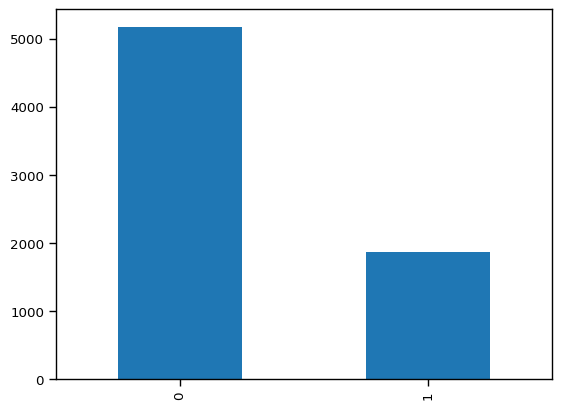

In [167]:
x=df['Churn'].value_counts()
x.plot(kind='bar')
plt.show()

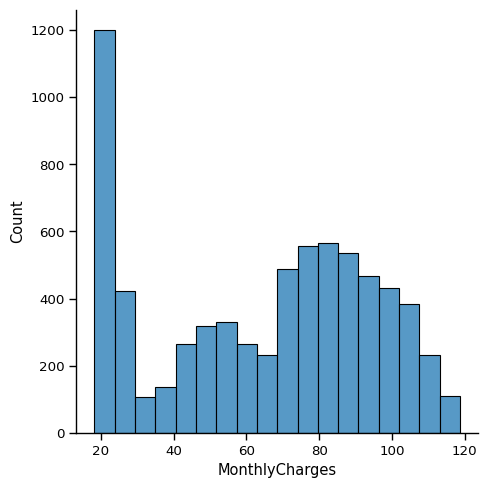

In [117]:
sns.displot(df, x=df.MonthlyCharges)
plt.show()

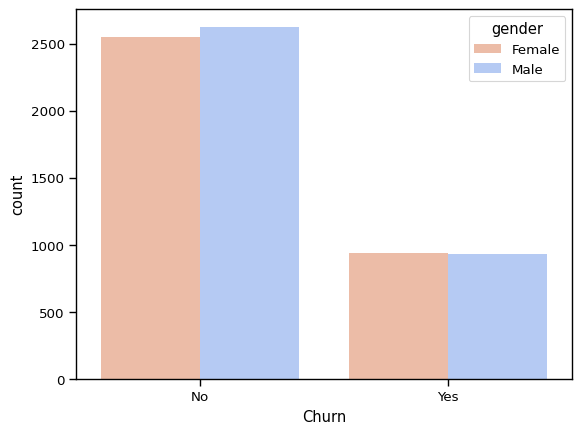

In [118]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")
plt.show()

In [119]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [120]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

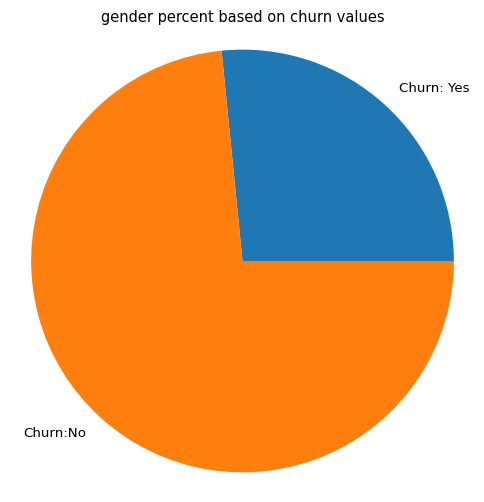

In [121]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
plt.pie(values, labels=labels)
plt.title("gender percent based on churn values")
plt.axis('equal')
plt.show()

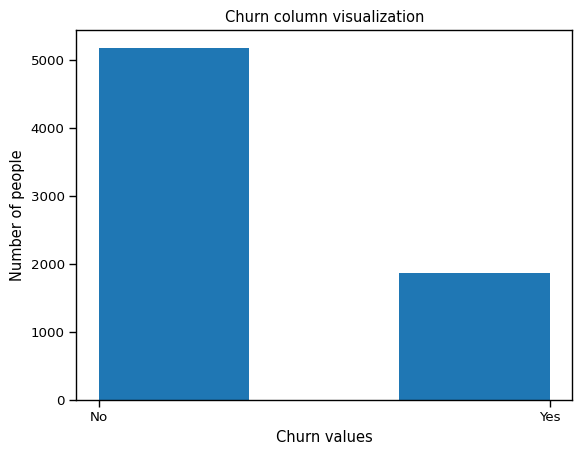

In [122]:
plt.hist(df['Churn'],bins=3)
plt.title("Churn column visualization")
plt.xlabel("Churn values")
plt.ylabel("Number of people")
plt.show()

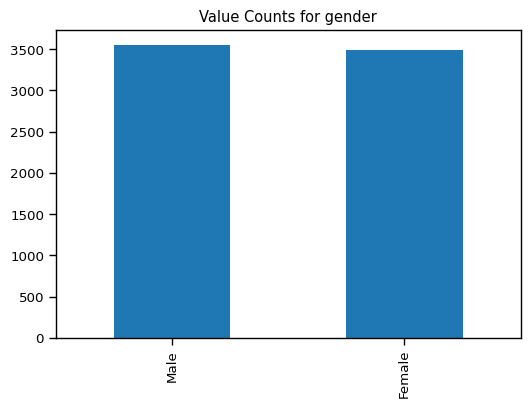

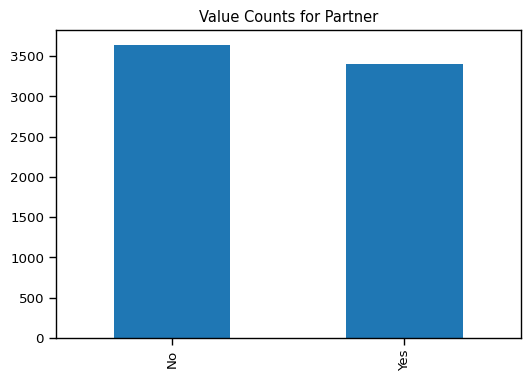

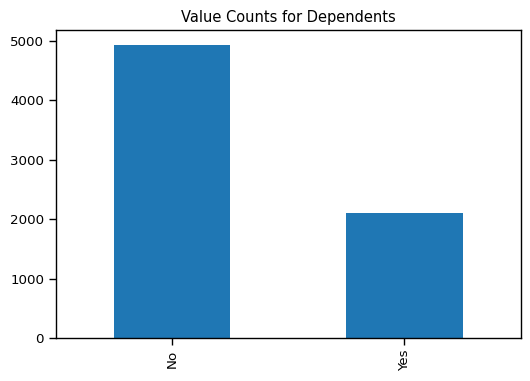

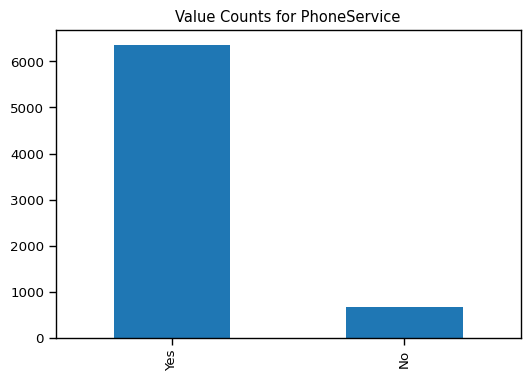

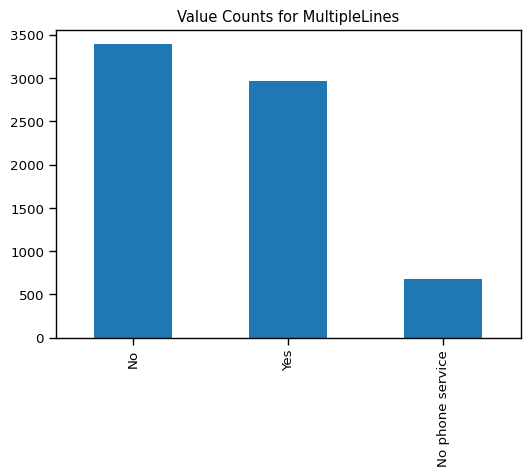

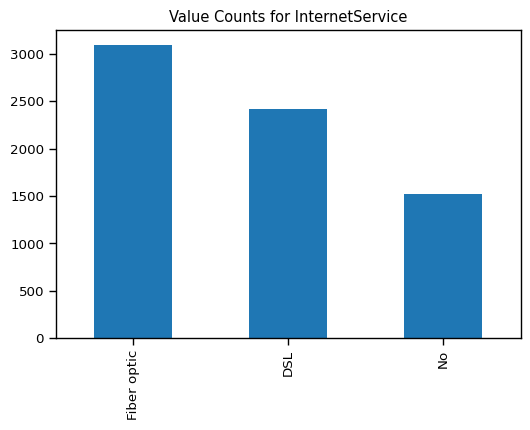

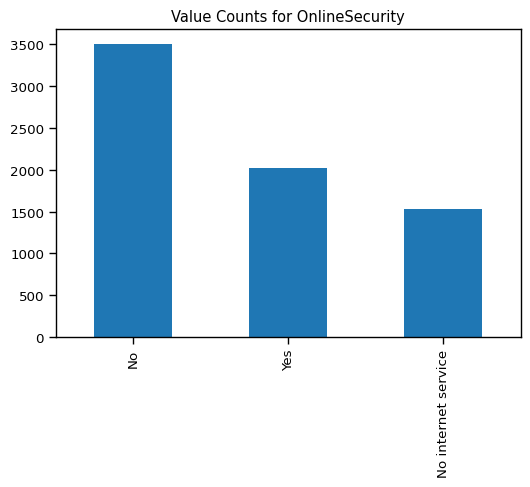

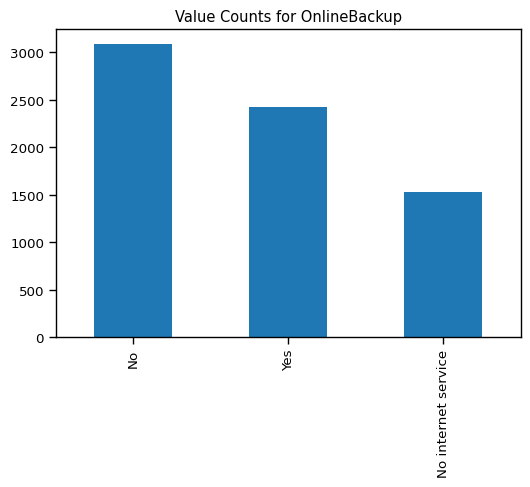

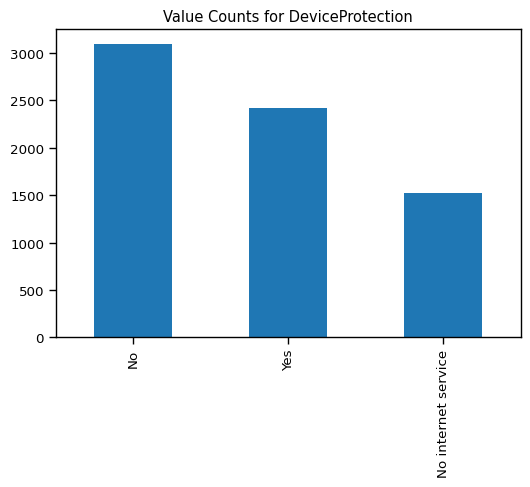

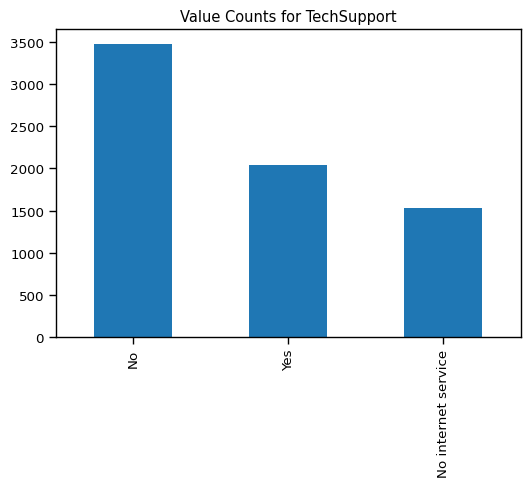

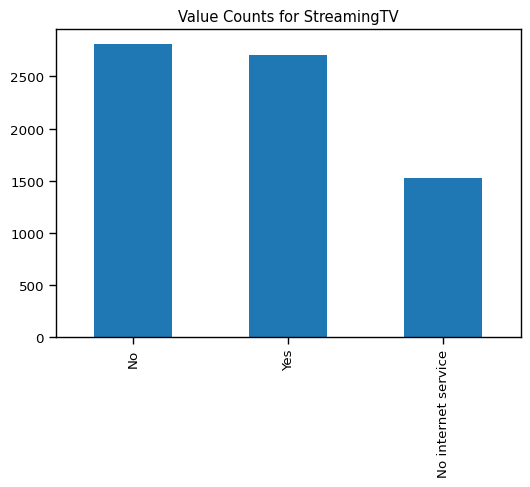

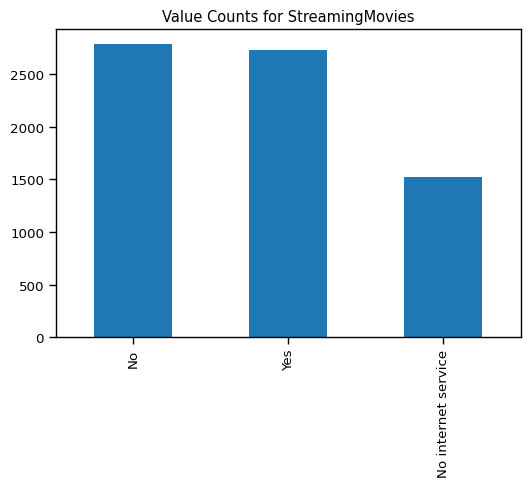

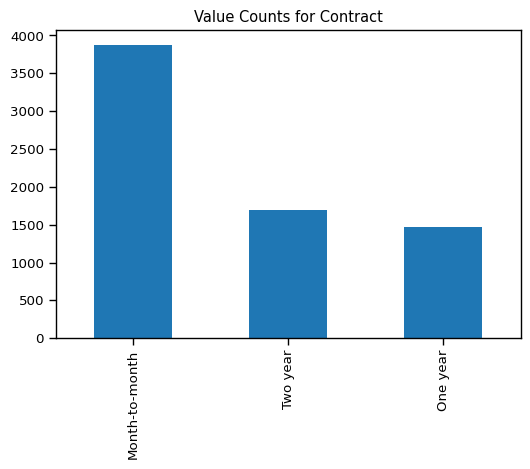

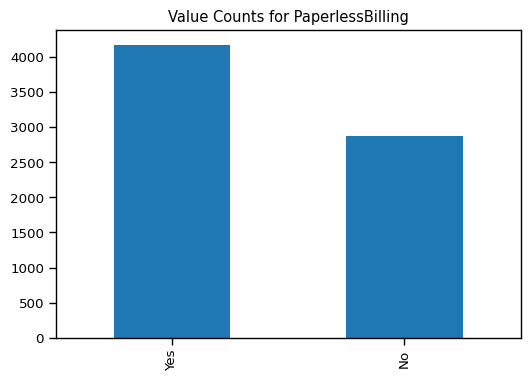

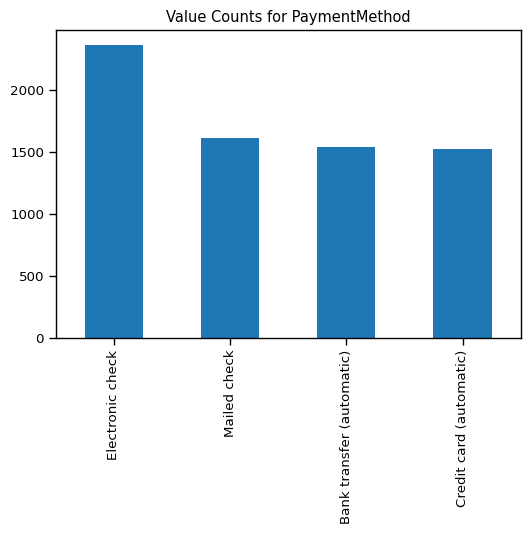

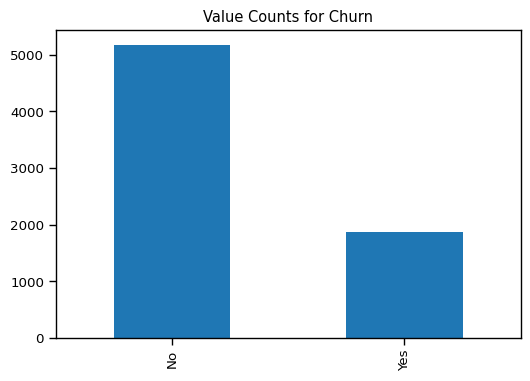

In [123]:
for i in categorical_columns:
  plt.figure(figsize=(6, 4))
  df[i].value_counts().plot.bar()
  plt.title(f'Value Counts for {i}')
plt.show()

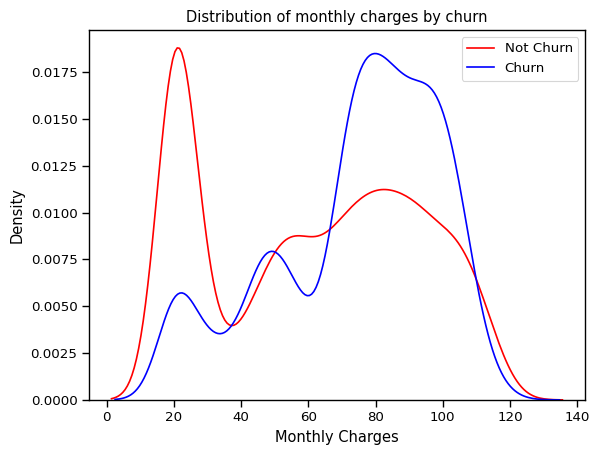

In [124]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="Red");
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Blue");
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

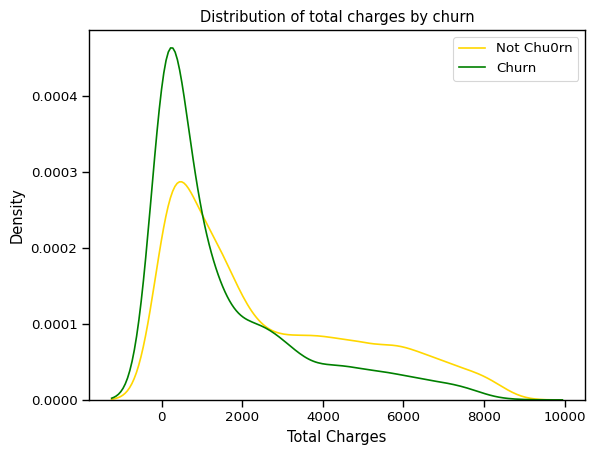

In [125]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold");
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green");
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

LABEL ENCODING ALL THE OBJECT TYPE COLUMNS IN THE DATASET

In [126]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [127]:
df = df.apply(lambda x: object_to_int(x))

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


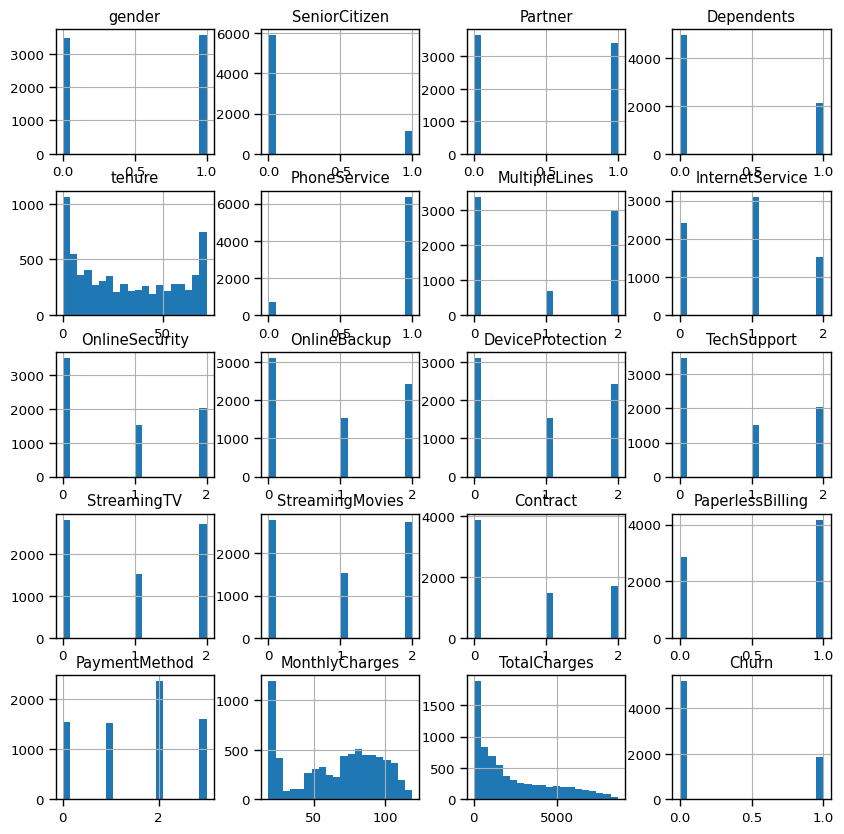

In [129]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

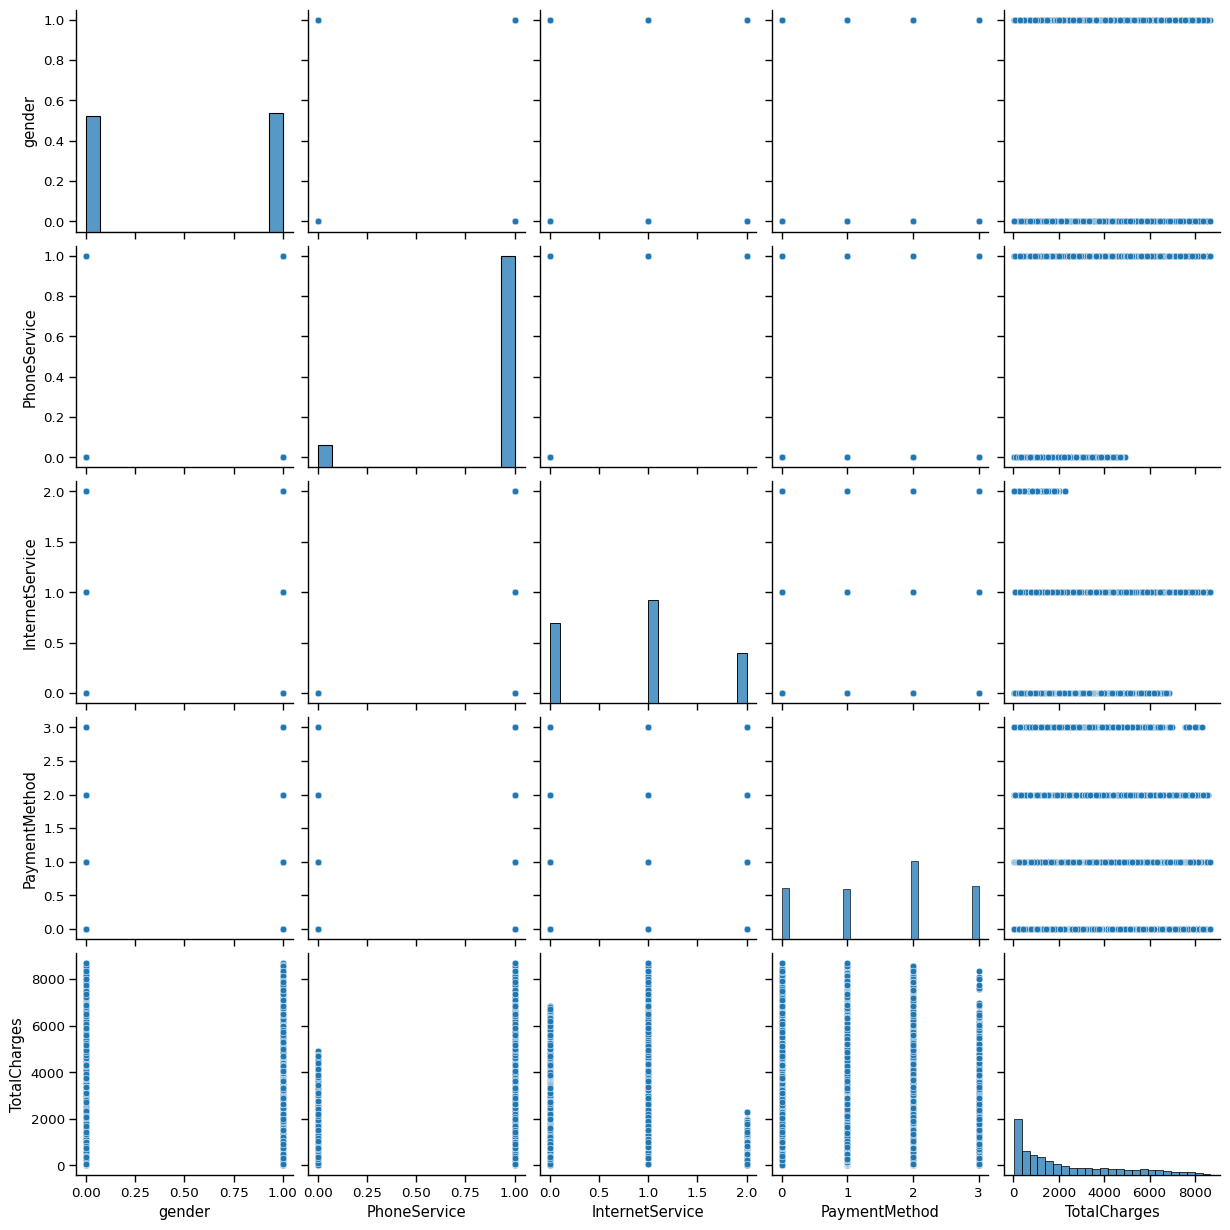

In [130]:
sns.pairplot(data = df, vars=['gender','PhoneService','InternetService','PaymentMethod','TotalCharges'])
plt.show()

<Figure size 5000x800 with 0 Axes>

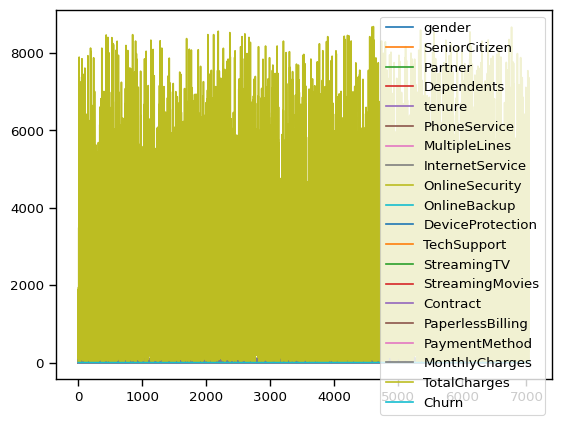

In [131]:
plt.figure(figsize=(50, 8))
df.plot()
plt.show()

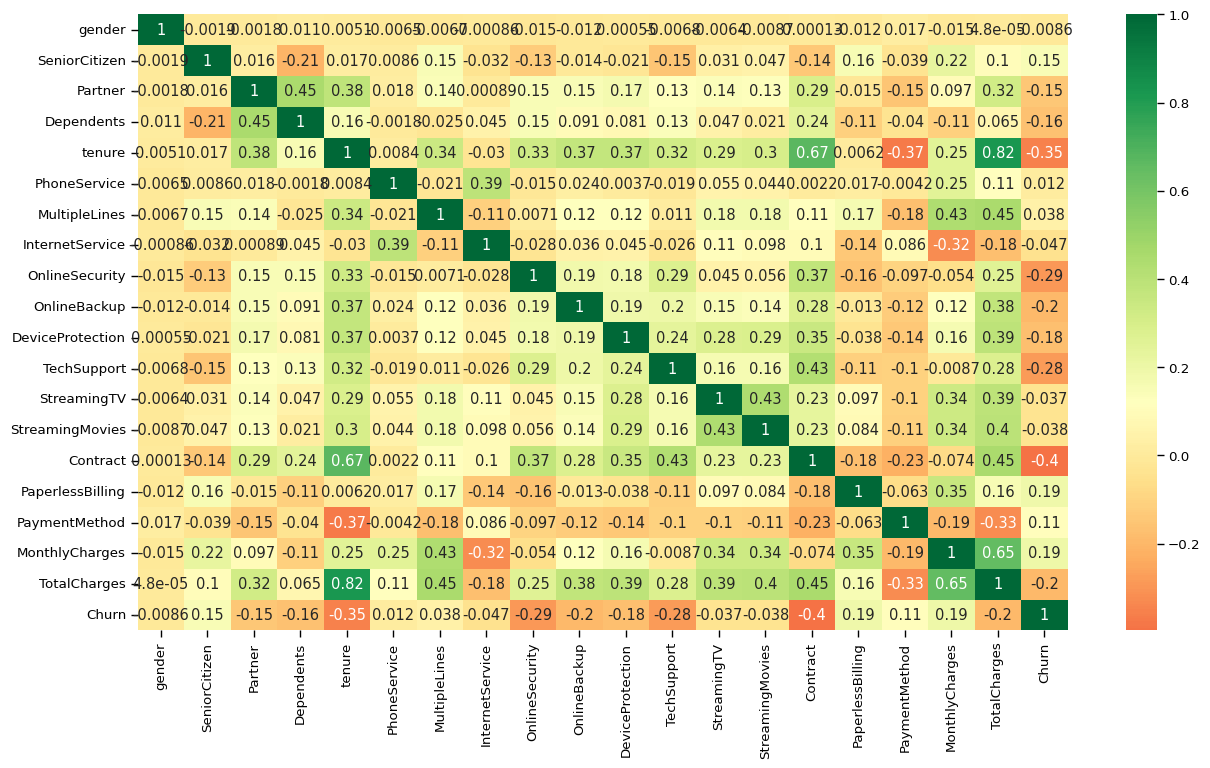

In [132]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

SPLITTING THE DATASET

In [133]:
X = df.drop(['Churn'], axis=1)
#standardScaler
scaler = StandardScaler()
scaler.fit(X)
standardisedData = scaler.transform(X)
X=standardisedData
y = df['Churn']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

In [134]:
import pickle
sc=StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
pickle.dump(sc,open('sc.pkl','wb'))

In [135]:
xtrain.shape

(5634, 19)

In [136]:
ytrain.shape

(5634,)

In [137]:
xtest.shape

(1409, 19)

BUILDING MACHINE LEARNING MODELS

Model-1

In [138]:
lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [139]:
logreg_predict=lr_model.predict(xtest)
ConfusionMatrix_logreg = confusion_matrix(ytest, logreg_predict)
print(ConfusionMatrix_logreg)

[[933 103]
 [156 217]]


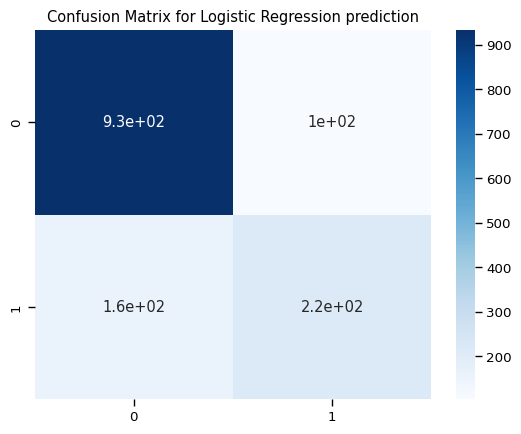

In [140]:
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

In [141]:
accuracy_lr = lr_model.score(xtest,ytest)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8161816891412349


Model-2

In [142]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [143]:
dt_predict=dt_model.predict(xtest)
ConfusionMatrix_dt = confusion_matrix(ytest, dt_predict)
print(ConfusionMatrix_dt)

[[841 195]
 [189 184]]


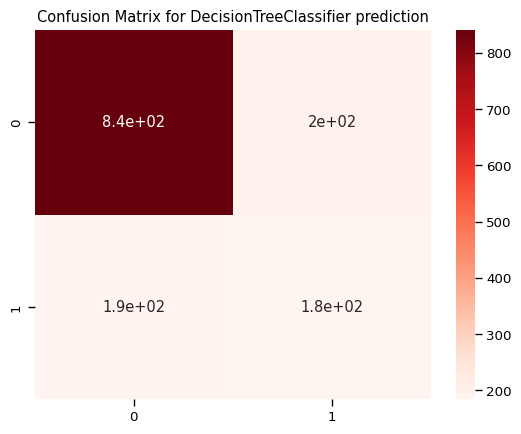

In [144]:
matrix_dt=sns.heatmap(ConfusionMatrix_dt,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for DecisionTreeClassifier prediction')
plt.show(matrix_dt)
plt.show()

In [145]:
predictdt_y = dt_model.predict(xtest)
accuracy_dt = dt_model.score(xtest,ytest)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7274662881476224


Model-3

In [146]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=50)

In [147]:
rf_predict=model_rf.predict(xtest)
ConfusionMatrix_rf = confusion_matrix(ytest, rf_predict)
print(ConfusionMatrix_rf)

[[954  82]
 [191 182]]


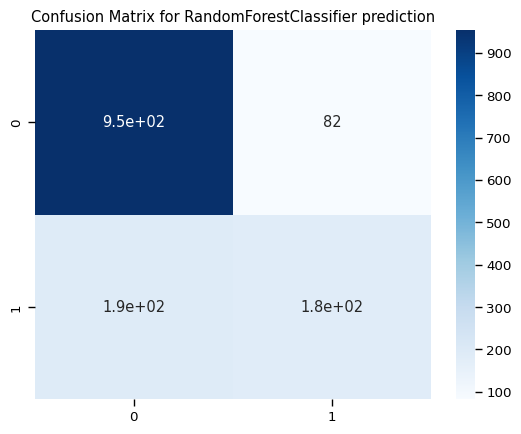

In [148]:
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for RandomForestClassifier prediction')
plt.show(matrix_rf)
plt.show()

In [149]:

prediction_test = model_rf.predict(xtest)
accuracy_rf=metrics.accuracy_score(ytest, prediction_test)
print (metrics.accuracy_score(ytest, prediction_test))

0.8062455642299503


Model-4

In [150]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=11)

In [151]:
knn_predict=knn_model.predict(xtest)
ConfusionMatrix_knn = confusion_matrix(ytest, knn_predict)
print(ConfusionMatrix_knn)

[[896 140]
 [166 207]]


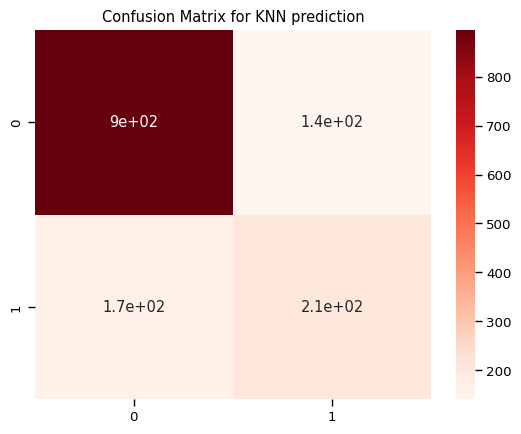

In [152]:
matrix_knn=sns.heatmap(ConfusionMatrix_knn,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for KNN prediction')
plt.show(matrix_knn)
plt.show()

In [153]:
predicted_y = knn_model.predict(xtest)
accuracy_knn = knn_model.score(xtest,ytest)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7828246983676366


Model-5

In [154]:
svc_model = SVC(random_state = 1)
svc_model.fit(xtrain,ytrain)

SVC(random_state=1)

In [155]:
svc_predict=svc_model.predict(xtest)
ConfusionMatrix_svc = confusion_matrix(ytest, svc_predict)
print(ConfusionMatrix_svc)

[[950  86]
 [186 187]]


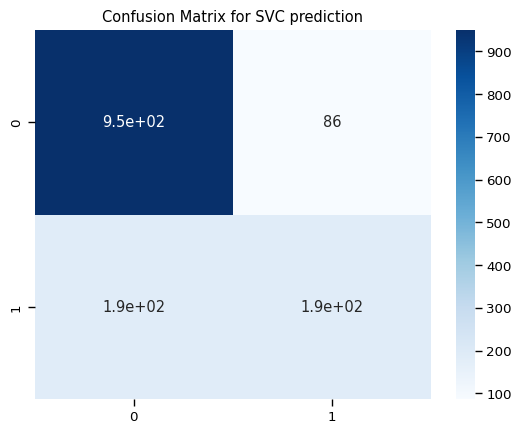

In [156]:
matrix_svc=sns.heatmap(ConfusionMatrix_svc,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVC prediction')
plt.show(matrix_rf)
plt.show()

In [157]:
predict_y = svc_model.predict(xtest)
accuracy_svc = svc_model.score(xtest,ytest)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8069552874378992


Model-6

In [158]:
a_model = AdaBoostClassifier()
a_model.fit(xtrain,ytrain)

AdaBoostClassifier()

In [159]:
a_preds = a_model.predict(xtest)
print("AdaBoost Classifier accuracy")
accuracy_ada=metrics.accuracy_score(ytest, a_preds)
accuracy_ada

AdaBoost Classifier accuracy


0.8034066713981547

In [160]:
ConfusionMatrix_ada = confusion_matrix(ytest, a_preds)
print(ConfusionMatrix_ada)

[[935 101]
 [176 197]]


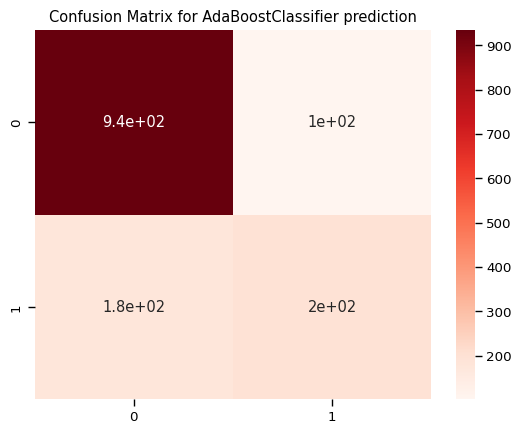

In [168]:
matrix_ada=sns.heatmap(ConfusionMatrix_ada,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for AdaBoostClassifier prediction')
plt.show(matrix_ada)
plt.show()

COMPARISION OF MODELS

In [162]:
a={'logistic regression':accuracy_lr,'decision tree':accuracy_dt,'random forest':accuracy_rf,'knn':accuracy_knn,'svc':accuracy_svc,'adaboost':accuracy_ada}
x=0
for i in a:
  x=max(x,a[i])
for i in a:
  if a[i]==x:
    print(i,"has best accuracy of",x)

logistic regression has best accuracy of 0.8161816891412349


In [163]:
model_comparison = pd.DataFrame ({
     'Accuracy Score': [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svc,accuracy_ada],
     'Model_Name': ['Logistic Regression','Decision Tree','Random Forest','K-Nearest Neighbor','Support Vector Machine','AdaBoostClassifier']

})
model_comparison_df = model_comparison.sort_values(by='Accuracy Score',ascending=False)
model_comparison_df = model_comparison_df.set_index('Accuracy Score')
model_comparison_df.reset_index()

,Accuracy Score,Model_Name
0,0.816182,Logistic Regression
1,0.806955,Support Vector Machine
2,0.806246,Random Forest
3,0.803407,AdaBoostClassifier
4,0.782825,K-Nearest Neighbor
5,0.727466,Decision Tree


IMPORTING AS A PICKLE FILE

In [164]:
pickle.dump(lr_model,open('Customer_churn_prediction.pkl','wb'))

In [165]:
Model_log = pickle.load(open('Customer_churn_prediction.pkl','rb'))
Model_log

LogisticRegression()

In [166]:
Model_log.predict(xtest)

array([1, 0, 0, ..., 0, 0, 1])